<a href="https://colab.research.google.com/github/Anuskadas564/OIBSIP/blob/main/Email_spam__classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization


In [ ]:
from wordcloud import WordCloud


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')  # Downloading stopwords data
nltk.download('punkt')  # Downloading tokenizer data
nltk.download('punkt_tab') # Downloading punkt_tab data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df = pd.read_csv('/content/spam (1).csv', encoding='latin-1')

In [ ]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.head(5).style

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [ ]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

styled_df = df.head().style

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([{'selector': 'th', 'props': [('color', 'Black'), ('background-color', '#FF00CC'), ('font-weight','bold')]}
])

,target,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [ ]:
df.isnull().sum()


,0
v1,0
v2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5169, 2)

In [ ]:
values = df['v1'].value_counts()
total = values.sum()

percentage_0 = (values[0] / total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 : ', percentage_0)
print('percentage of 1 : ', percentage_1)

import matplotlib.pyplot as plt

# Sample data
# values = [75, 25]

percentage of 0 :  87.3669955503966
percentage of 1 :  12.633004449603405


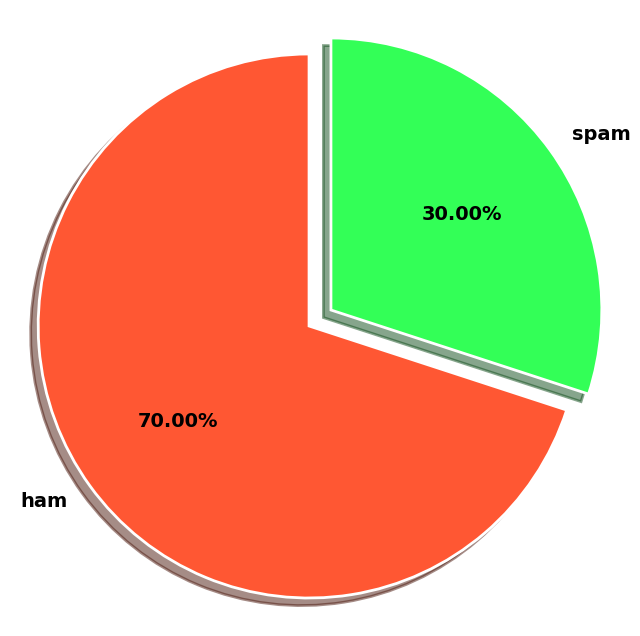

In [ ]:
import matplotlib.pyplot as plt

# Example values (you can change these based on your data)
values = [70, 30]  # 70% ham, 30% spam

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values,
    labels=['ham', 'spam'],
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,
    shadow=True
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')
ax.axis('equal')
plt.show()




In [ ]:
df['num_characters'] = df['v2'].apply(len)
df['num_words'] = df['v2'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['v2'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['v1'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


/tmp/ipython-input-85-3255246248.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


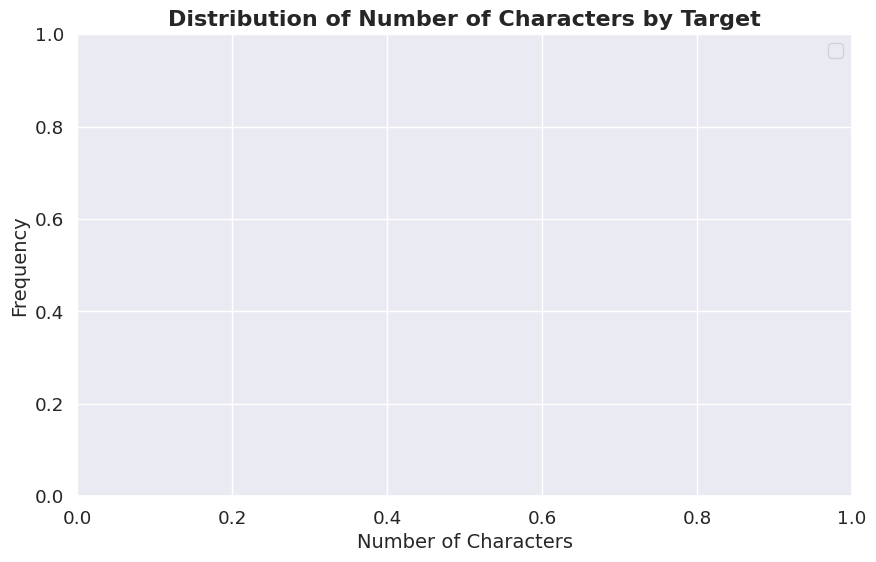

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['v1'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['v1'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Apply Label Encoding to the target variable 'v1' and store it in 'y'
encoder = LabelEncoder()
y = encoder.fit_transform(df['v1'])

# Create a temporary DataFrame with the numerical columns and the encoded target variable
temp_df = df[['num_characters', 'num_words', 'num_sentence']].copy()
temp_df['target_encoded'] = y

# Calculate the correlation matrix
correlation_matrix = temp_df.corr()

# Display the correlation matrix
display(correlation_matrix)

,num_characters,num_words,num_sentence,target_encoded
num_characters,1.000000,0.965760,0.624139,0.384717
num_words,0.965760,1.000000,0.679971,0.262912
num_sentence,0.624139,0.679971,1.000000,0.263939
target_encoded,0.384717,0.262912,0.263939,1.000000


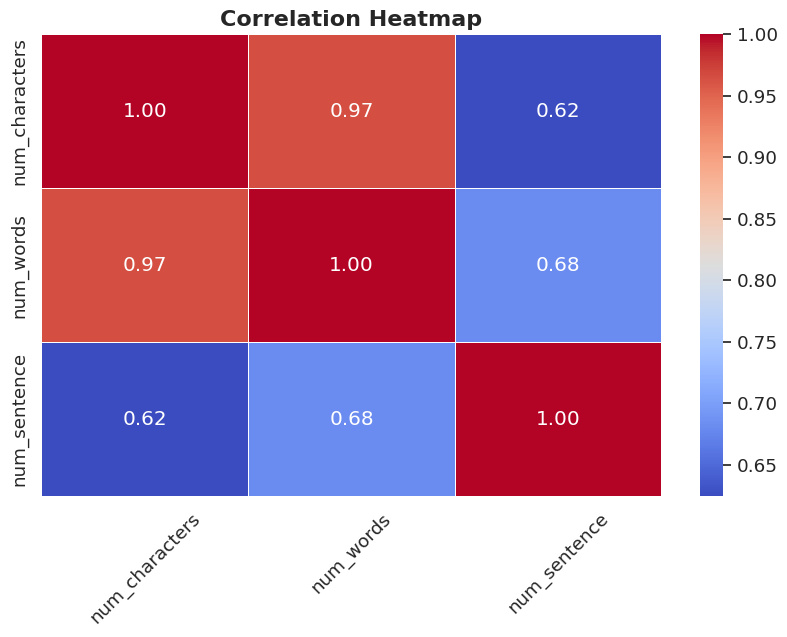

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[[ 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Set a title for the heatmap
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

In [ ]:
# Importing the Porter Stemmer for text stemming
from nltk.stem import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text, target):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Store alphanumeric tokens
    alphanumeric_tokens = y[:]

    # If it's a ham message (target 0), remove stop words and perform stemming
    if target == 0:
        # Removing stop words
        text = alphanumeric_tokens[:]
        y.clear()
        for i in text:
          if i not in stopwords.words('english'):
            y.append(i)

        # Stemming using Porter Stemmer
        text = y[:]
        y.clear()
        for i in text:
          y.append(ps.stem(i))

        # If after stopword removal and stemming, no words remain, use alphanumeric tokens
        if not y:
            y = alphanumeric_tokens

    # If it's a spam message (target 1), only keep the alphanumeric tokens (already in y)
    elif target == 1:
        pass # y already contains alphanumeric tokens

    # Join the processed tokens back into a single string
    return " ".join(y)

In [ ]:
df['transformed_text'] = df.apply(lambda row: transform_text(row['v2'], row['v1']), axis=1)

styled_df = df.head(5).style

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([{
    "selector": "th",
    "props": [("color", 'Black'), ("background-color", '#FF00CC'), ('font-weight', 'bold')]
}])

,v1,v2,num_characters,num_words,num_sentence,transformed_text,teget
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entry in 2 a wkly comp to win fa cup final tkts 21st may text fa to 87121 to receive entry question std txt rate t c apply 08452810075over18,free entry wkly comp win fa cup final tkts may text fa receive entry question std txt rate c apply
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah i do think he goes to usf he lives around here though,nah think goes usf lives around though


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate WordCloud for spam messages (target == 1)
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_text = df[df['v1'] == 1]['transformed_text'].str.cat(sep=" ")

# Handle empty spam_text (optional safety)
if spam_text.strip():
    spam_wc = wc.generate(spam_text)

    # Plot
    plt.figure(figsize=(15, 6))
    plt.imshow(spam_wc)
    plt.axis('off')
    plt.title("WordCloud for Spam Messages")
    plt.show()
else:
    print("No spam text found to generate WordCloud.")

No spam text found to generate WordCloud.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier


cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 2000)

X = tfid.fit_transform(df['transformed_text']).toarray()

# Apply Label Encoding to the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(df['v1'])


X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

    accuracy_scores = []
    precision_scores = []
    for name ,classifier in clfs.items():
         if name == 'Bgc':  # Skip BaggingClassifier temporarily
              print(f"Skipping BaggingClassifier (Bgc) due to ongoing error.")
              continue
    current_accuracy, current_precision = train_classifier(classifier, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
print()
print("For: ",name)
print("Accuracy: ", current_accuracy)
print("Precision: ", current_precision)

accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)


For:  Bgc
Accuracy:  0.9458413926499033
Precision:  0.9456521739130435
